# COMPARE

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
sp_symbol = '^GSPC'
sp_dailey_data = yf.download(sp_symbol)

[*********************100%***********************]  1 of 1 completed


In [3]:
sp_close = sp_dailey_data[['Adj Close']]
sp_close = sp_close.reset_index()
sp_close.columns = ['Date', 'S&P 500']

# sp_close #.info()

In [4]:
my_file_name = 'chart.csv'
my_close = pd.read_csv(my_file_name, engine='python', skipfooter=3)
my_close.columns = ['Date', 'Cochran']
my_close['Date'] = my_close['Date'].astype('datetime64')
my_close['Cochran'] = my_close['Cochran'].str.replace(',', '').astype('float')

# my_close #.info()

In [5]:
start = pd.Timestamp('2021-10-11')
logic = my_close['Date'] >= start
my_close = my_close[logic]

# my_close

In [6]:
close = pd.merge(sp_close, my_close, on='Date')
close = close.set_index('Date')

scale = close/close.iloc[0]
scale = scale.melt(var_name='Fund', value_name='Adj Close', ignore_index=False)
scale = scale.reset_index()

# scale

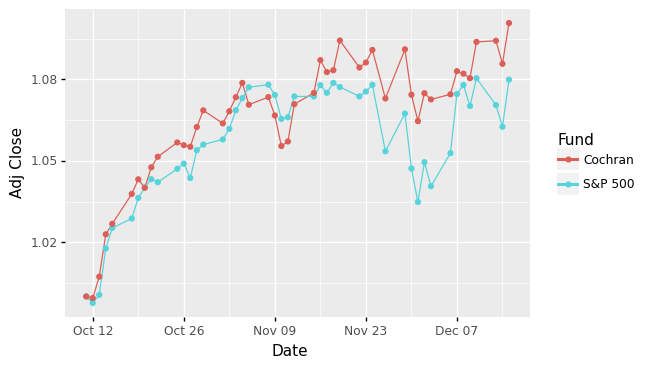

<ggplot: (8765970299389)>

In [14]:
p = p9.ggplot(data=scale, mapping=p9.aes(x='Date', y='Adj Close', color='Fund'))
p += p9.theme(figure_size=(6, 4))
p += p9.scale_x_datetime(breaks=date_breaks('2 weeks'), labels=date_format('%b %d'))
p += p9.geom_line()
p += p9.geom_point()

p

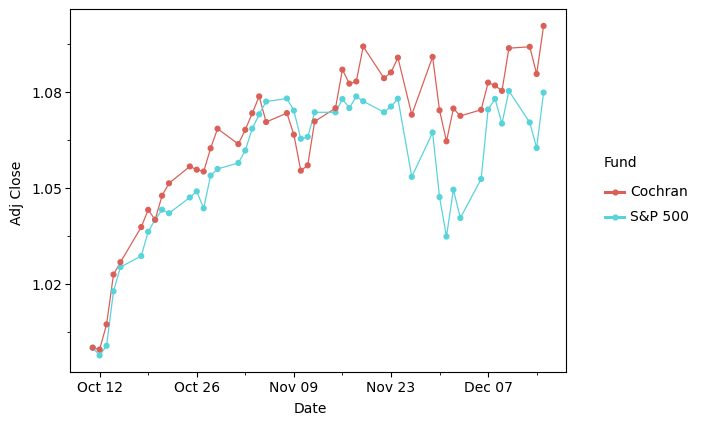

<ggplot: (8765970549869)>

In [15]:
p = p9.ggplot(data=scale, mapping=p9.aes(x='Date', y='Adj Close', color='Fund'))
p += p9.theme_matplotlib()
p += p9.scale_x_datetime(breaks=date_breaks('2 weeks'), labels=date_format('%b %d'))
p += p9.geom_line()
p += p9.geom_point()

p #.save('test.png')